In [284]:
import pandas as pd
import warnings
import numpy as np
from ipywidgets import interactive
import matplotlib.pyplot as plt
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks


import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


# threshold=0.001

warnings.filterwarnings("ignore")

In [178]:
def plot_func(a, f):
    plt.figure(2)
    x = np.linspace(0, 2*np.pi, num=1000)
    y = a*np.sin(1/f*x)
    plt.plot(x,y)
    plt.ylim(-1.1, 1.1)
    plt.title('a sin(f)')
    plt.show()

interactive_plot = interactive(plot_func, a=(-1,0,0.1), f=(0.1, 1))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=-1.0, description='a', max=0.0, min=-1.0), FloatSlider(value=0.55, des…

In [289]:
# data=pd.read_csv('Laundry_Data.csv')

url = 'https://raw.githubusercontent.com/hamza93285/Laundry-Data-Analysis/master/Laundry_Data.csv'
data= pd.read_csv(url)


In [290]:
data.head()

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,1,19/10/2015,20:17:50,malay,NaN,moderate,NaN,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,NaN,short_sleeve,blue_jeans,long,NaN,6,9,no
2,3,19/10/2015,20:58:31,malay,female,NaN,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,NaN,4,10,no
3,4,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,NaN,short_sleeve,yellow,short,clothes,5,9,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no


# Data Preprocessing

In [181]:
import math
for i in range(len(data)):
    val=data['Kids_Category'].iloc[i]
    if type(val)==str:
        continue
    if math.isnan(val):
        if data['With_Kids'].iloc[i]=='no':
            data['Kids_Category'].iloc[i]='no_kids'
            

    

In [182]:
for i in range(len(data)):
    val=data['With_Kids'].iloc[i]
    if type(val)==str:
        continue
    if math.isnan(val):
        if type(data['Kids_Category'].iloc[i])==str:
            if data['Kids_Category'].iloc[i]=='no_kids':
                data['With_Kids'].iloc[i]='no'
            else:
                data['With_Kids'].iloc[i]='yes'


data['Age_Range']=pd.cut(data['Age_Range'],bins=[27,34,41,48,55,np.inf],labels=['27+','34+','41+','48+','54+'])



In [183]:
####Missing value
all_cols=['Basket_Size', 'Basket_colour', 'Attire','Shirt_Colour', 'shirt_type', 'Pants_Colour', 'pants_type', 'Wash_Item']

for col in all_cols:
    data[col]=data[col].fillna('unkown')
    
    
data['Race']=data['Race'].fillna('unkown')
data['Gender']=data['Gender'].fillna('unkown')
data['Body_Size']=data['Body_Size'].fillna('unkown')
data['Age_Range']=data['Age_Range'].fillna('27+')

data['With_Kids']=data['With_Kids'].fillna('unkown')
data['Kids_Category']=data['Kids_Category'].fillna('unkown')
    

In [184]:
#associateMinning_data=data.copy()

# Feature Engineering 

In [185]:
def hour_to_Daypart(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'
    
    
    
    
data['Time']=pd.to_datetime(data['Time'])
data['Hour']=data['Time'].dt.hour
data['Day_part']=data['Hour'].apply(hour_to_Daypart)


In [186]:
data['Date']=pd.DatetimeIndex(data.Date)
data['Month_name']=data.Date.dt.month_name()

In [187]:

cal = calendar()
holidays = cal.holidays(start=data.Date.min(), end=data.Date.max())
data['Holiday'] = data['Date'].isin(holidays)

In [188]:
data['Is_WEEKDAY'] = ((pd.DatetimeIndex(data.Date).dayofweek) // 5 == 1).astype(float)
data['Weekday_or_Weekend'] =np.where(((pd.DatetimeIndex(data.Date).dayofweek)) < 5,'Weekday','Weekend')
data.drop(['No','Date','Time','Is_WEEKDAY','Hour'],axis=1,inplace=True)
data['Holiday'] =np.where(((data.Holiday)==True),'Holiday','Not_Holiday')

In [189]:
sample=data.copy()
washer_y=sample['Washer_No'].values
dryer_y=sample['Dryer_No'].values
sample.drop(['Washer_No','Dryer_No'],axis=1,inplace=True)
X=sample.copy()

In [190]:
[i for i in range(len(data.columns)-1)]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [218]:
encoded_data=data.copy()
from sklearn import preprocessing
for col in data.columns:
    print(col)
    if (col=='Washer_No') or (col=='Dryer_No'):
        continue
    le = preprocessing.LabelEncoder()
    encoded_data[col]=le.fit_transform(encoded_data[col])



Race
Gender
Body_Size
Age_Range
With_Kids
Kids_Category
Basket_Size
Basket_colour
Attire
Shirt_Colour
shirt_type
Pants_Colour
pants_type
Wash_Item
Washer_No
Dryer_No
Spectacles
Day_part
Month_name
Holiday
Weekday_or_Weekend


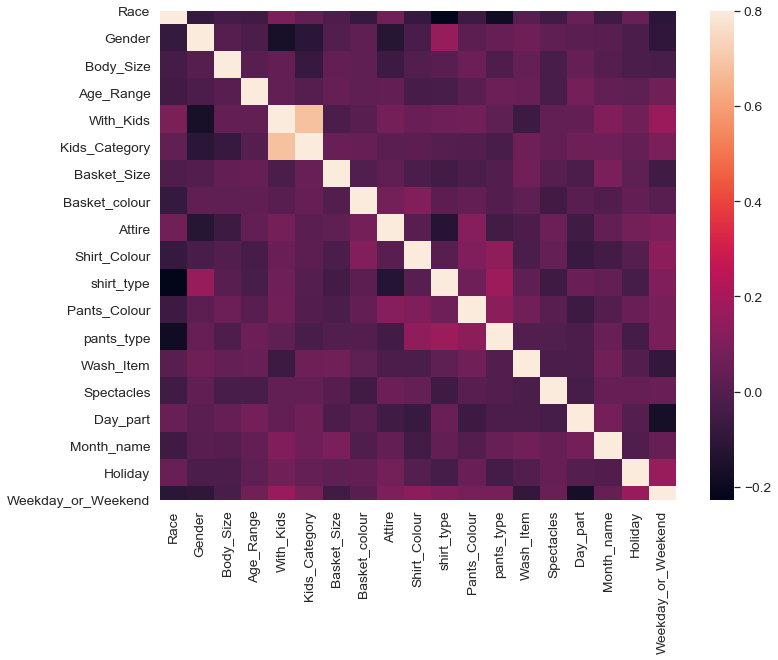

In [283]:
corrmat = encoded_data.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [220]:

corrmat


,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,Day_part,Month_name,Holiday,Weekday_or_Weekend
Race,1.000000,-0.082968,-0.040149,-0.048776,0.095903,0.029524,-0.017866,-0.081207,0.065632,-0.079364,...,-0.064441,-0.183658,0.008815,-0.039363,0.007864,-0.051536,0.047682,-0.058607,0.045482,-0.114056
Gender,-0.082968,1.000000,0.004053,-0.020890,-0.160414,-0.112773,-0.007181,0.028681,-0.120546,-0.030273,...,0.018262,0.042962,0.059499,0.009319,-0.037142,0.026201,0.013279,0.005626,-0.026832,-0.098155
Body_Size,-0.040149,0.004053,1.000000,0.010433,0.033353,-0.078111,0.033493,0.026753,-0.065526,-0.007238,...,0.054832,-0.015386,0.038130,0.064767,0.010854,-0.030007,0.042747,0.004880,-0.024486,-0.030330
Age_Range,-0.048776,-0.020890,0.010433,1.000000,0.030516,0.004078,0.041612,0.026019,0.035033,-0.032885,...,0.012749,0.055951,0.045671,0.065435,0.017227,-0.029379,0.079180,0.032181,0.021877,0.065235
With_Kids,0.095903,-0.160414,0.033353,0.030516,1.000000,0.685299,-0.025322,0.005442,0.078596,0.051724,...,0.072667,0.021319,-0.060517,-0.047031,0.023072,0.029978,0.033463,0.105542,0.071432,0.166849
Kids_Category,0.029524,-0.112773,-0.078111,0.004078,0.685299,1.000000,0.047184,0.043150,0.016408,0.017041,...,-0.006019,-0.029339,0.061033,-0.065045,-0.002491,0.036885,0.059755,0.061604,0.038978,0.097306
Basket_Size,-0.017866,-0.007181,0.033493,0.041612,-0.025322,0.047184,1.000000,-0.010908,0.027586,-0.026224,...,-0.023366,-0.010462,0.072457,-0.013364,0.002088,0.004360,-0.019626,0.092330,0.021556,-0.054033
Basket_colour,-0.081207,0.028681,0.026753,0.026019,0.005442,0.043150,-0.010908,1.000000,0.076813,0.112996,...,0.034431,-0.005076,0.023733,0.070380,-0.025816,-0.048781,0.012464,-0.011384,0.035964,0.011305
Attire,0.065632,-0.120546,-0.065526,0.035033,0.078596,0.016408,0.027586,0.076813,1.000000,0.011948,...,0.118244,-0.043757,-0.020216,0.080295,0.044995,0.055982,-0.051882,0.034715,0.073594,0.100545
Shirt_Colour,-0.079364,-0.030273,-0.007238,-0.032885,0.051724,0.017041,-0.026224,0.112996,0.011948,1.000000,...,0.103150,0.145452,-0.023524,0.006557,0.042402,0.040462,-0.071725,-0.044296,-0.000424,0.129533


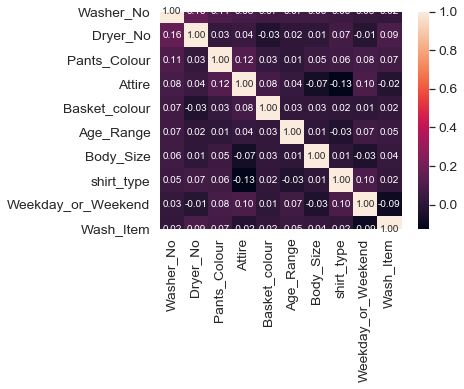

In [221]:
k = 10 
cols = corrmat.nlargest(k, 'Washer_No')['Washer_No'].index
cm = np.corrcoef(encoded_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

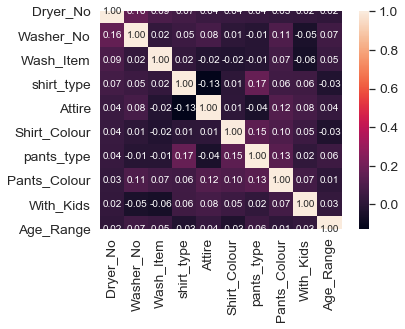

In [222]:
k = 10 
cols = corrmat.nlargest(k, 'Dryer_No')['Dryer_No'].index
cm = np.corrcoef(encoded_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [223]:

# sns.set()
# cols = encoded_data.columns
# sns.pairplot(encoded_data[cols], size = 2.5)
# plt.show()

In [250]:
encoded_data.drop(['Washer_No','Dryer_No'],axis=1,inplace=True)

In [225]:

from imblearn.over_sampling import SMOTENC

sm = SMOTENC(random_state=42,categorical_features=[i for i in range(len(data.columns)-3)])
washer_X, washer_Y = sm.fit_resample(encoded_data, washer_y)
dryer_X, dryer_Y = sm.fit_resample(encoded_data, dryer_y)

In [226]:
washer_X=pd.DataFrame(washer_X,columns=encoded_data.columns)
dryer_X=pd.DataFrame(dryer_X,columns=encoded_data.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218D929BA20>]],
      dtype=object)

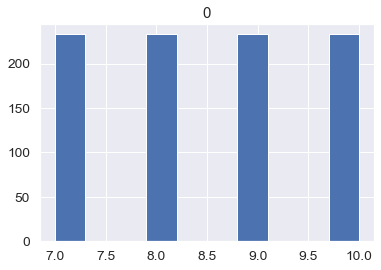

In [227]:
pd.DataFrame(dryer_Y).hist()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218D98009B0>]],
      dtype=object)

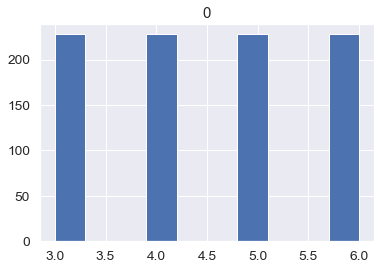

In [228]:
pd.DataFrame(washer_Y).hist()

In [229]:
def important_features(X,y):
    model = ExtraTreesClassifier()
    model.fit(X,y)

    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    plt.figure(figsize=(10, 10))
    feat_importances.nlargest(48).plot(kind='barh')
    plt.show()
    
    
    model1 = SelectFromModel(model, prefit=True) 
    New_features = model1.transform(X)
    
    feature_idx = model1.get_support()
    feature_name = X.columns[feature_idx]

    new_feat=pd.DataFrame(X,columns=feature_name)
    
    return new_feat

    
    
    
    

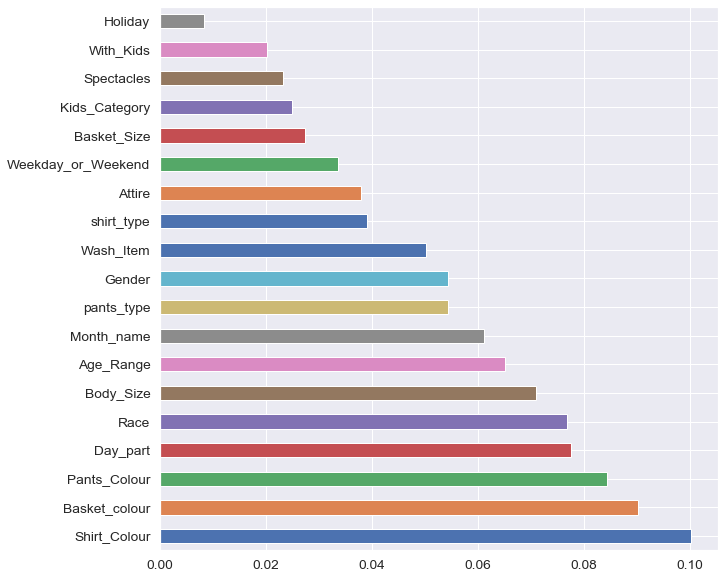

In [230]:
washer_feat=important_features(washer_X,washer_Y)

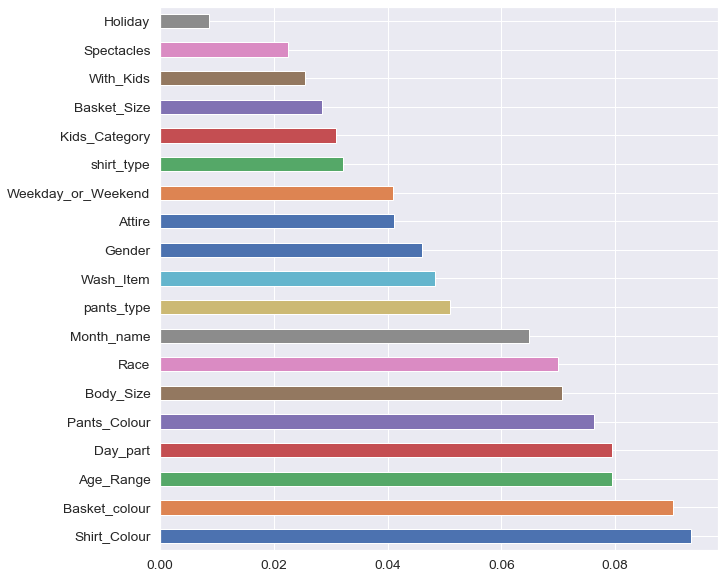

In [231]:
dryer_feat=important_features(dryer_X,dryer_Y)

In [232]:

# test_feat=pd.DataFrame(test_feature,columns=feature_name)


In [233]:
washer_feat.head()

,Race,Gender,Body_Size,Age_Range,Basket_colour,Shirt_Colour,Pants_Colour,pants_type,Day_part,Month_name
0,3.0,2.0,1.0,0.0,8.0,2.0,0.0,1.0,1.0,6.0
1,2.0,1.0,2.0,0.0,3.0,10.0,5.0,0.0,1.0,6.0
2,3.0,0.0,3.0,0.0,1.0,9.0,0.0,0.0,1.0,6.0
3,2.0,1.0,2.0,3.0,0.0,10.0,15.0,1.0,4.0,6.0
4,2.0,1.0,1.0,0.0,1.0,2.0,14.0,0.0,4.0,6.0


In [234]:
dryer_feat.head()

,Race,Body_Size,Age_Range,Basket_colour,Shirt_Colour,Pants_Colour,Day_part,Month_name
0,3.0,1.0,0.0,8.0,2.0,0.0,1.0,6.0
1,2.0,2.0,0.0,3.0,10.0,5.0,1.0,6.0
2,3.0,3.0,0.0,1.0,9.0,0.0,1.0,6.0
3,2.0,2.0,3.0,0.0,10.0,15.0,4.0,6.0
4,2.0,1.0,0.0,1.0,2.0,14.0,4.0,6.0


# Exploratory Data Analysis

In [235]:
data.head()

,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,...,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,Day_part,Month_name,Holiday,Weekday_or_Weekend
0,malay,unkown,moderate,27+,yes,young,big,red,casual,blue,...,black,short,clothes,3,10,no,Evening,October,Not_Holiday,Weekday
1,indian,male,thin,27+,no,no_kids,big,green,casual,unkown,...,blue_jeans,long,unkown,6,9,no,Evening,October,Not_Holiday,Weekday
2,malay,female,unkown,27+,no,no_kids,big,blue,casual,red,...,black,long,unkown,4,10,no,Evening,October,Not_Holiday,Weekday
3,indian,male,thin,48+,no,no_kids,unkown,black,casual,unkown,...,yellow,short,clothes,5,9,no,Night,October,Not_Holiday,Weekday
4,indian,male,moderate,27+,no,no_kids,big,blue,casual,blue,...,white,long,clothes,3,9,no,Night,October,Not_Holiday,Weekday


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DAB11C50>,
      dtype=object)

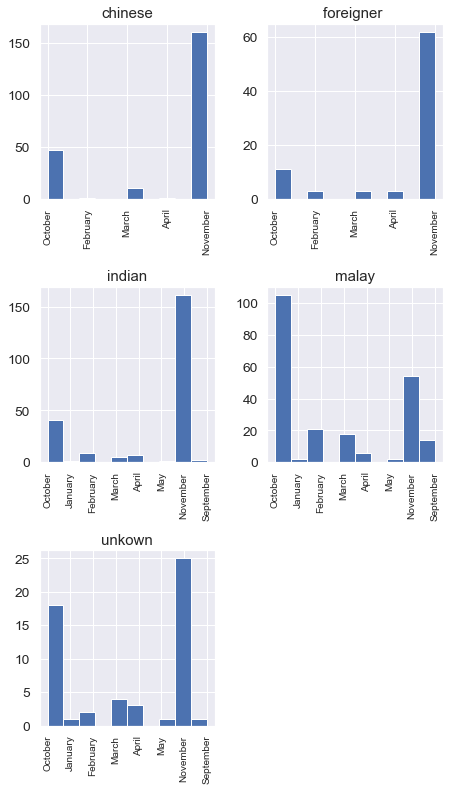

In [236]:
data[['Month_name','Race']].Month_name.hist(by=data.Race,xlabelsize=10,figsize=(7,13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DAA6CF60>,
      dtype=object)

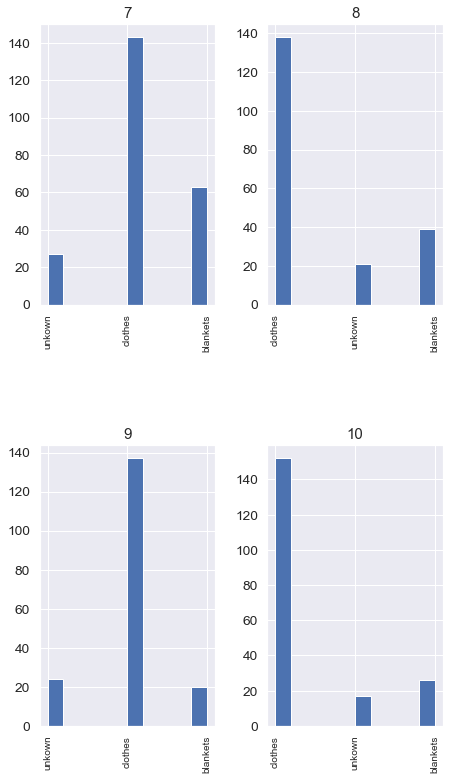

In [237]:
data[['Wash_Item','Dryer_No']].Wash_Item.hist(by=data.Dryer_No,xlabelsize=10,figsize=(7,13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DAE96748>,
      dtype=object)

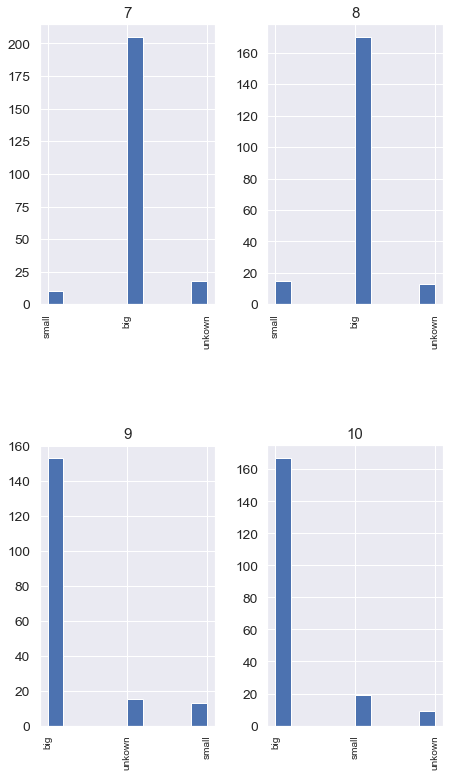

In [238]:
data[['Basket_Size','Dryer_No']].Basket_Size.hist(by=data.Dryer_No,xlabelsize=10,figsize=(7,13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DB1F8438>,
      dtype=object)

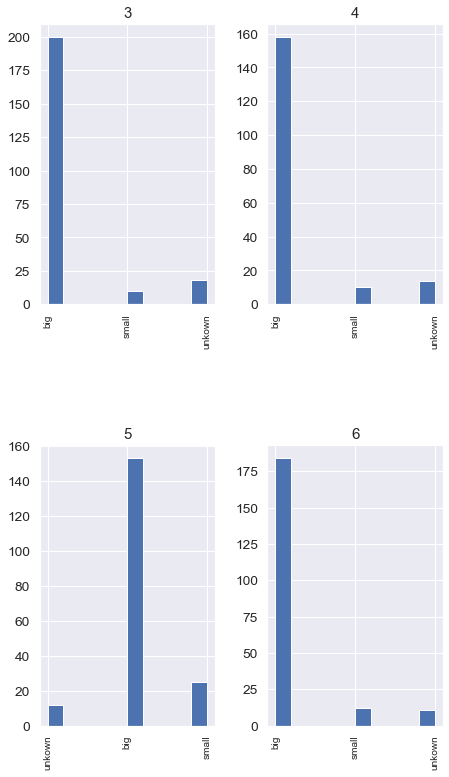

In [239]:
data[['Basket_Size','Washer_No']].Basket_Size.hist(by=data.Washer_No,xlabelsize=10,figsize=(7,13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DB1C2080>,
      dtype=object)

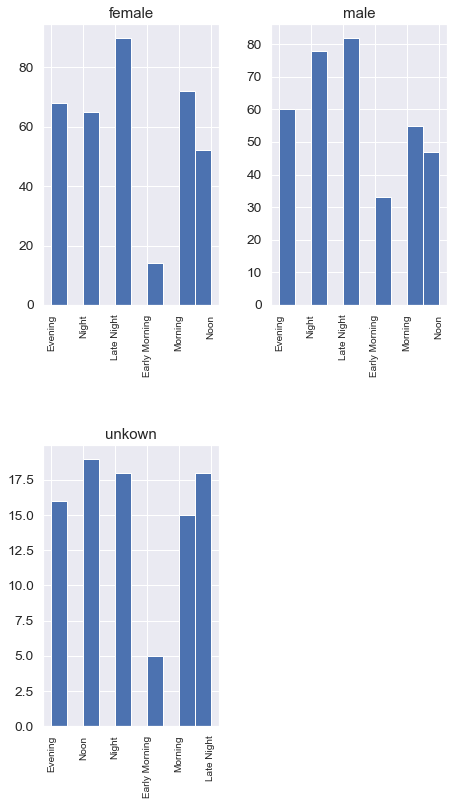

In [240]:
data[['Day_part','Gender']].Day_part.hist(by=data.Gender,xlabelsize=10,figsize=(7,13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DB941B38>,
      dtype=object)

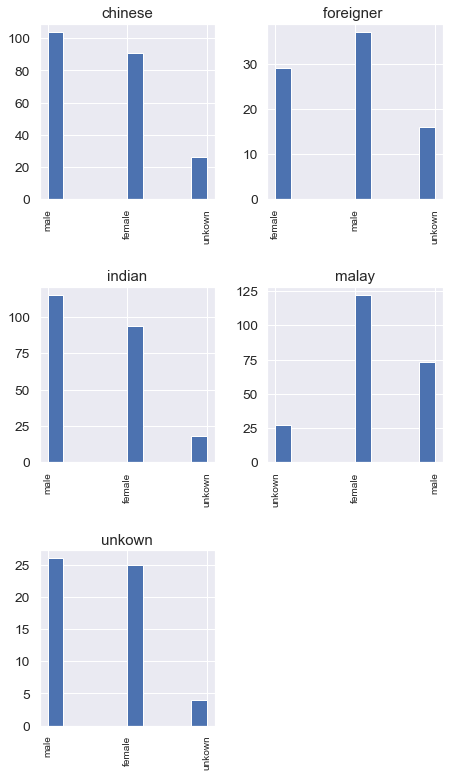

In [241]:
data[['Race','Gender']].Gender.hist(by=data.Race,xlabelsize=10,figsize=(7,13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DBD83B70>,
      dtype=object)

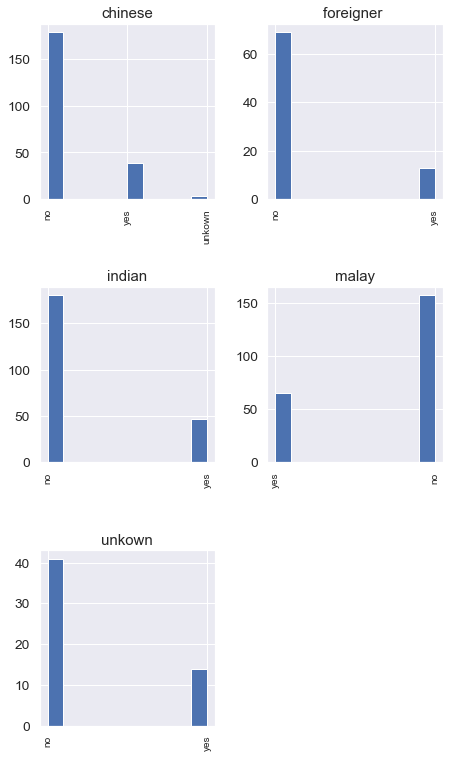

In [242]:
data[['Race','With_Kids']].With_Kids.hist(by=data.Race,xlabelsize=10,figsize=(7,13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DBD4E320>,
      dtype=object)

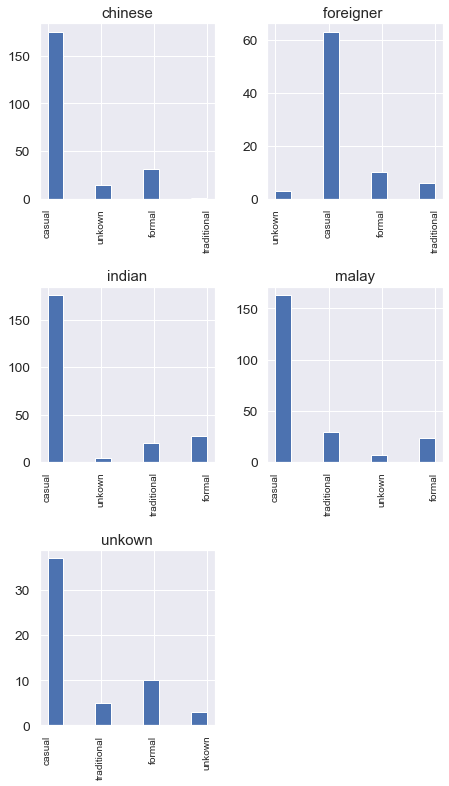

In [243]:
data[['Race','Attire']].Attire.hist(by=data.Race,xlabelsize=10,figsize=(7,13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DA870EB8>,
      dtype=object)

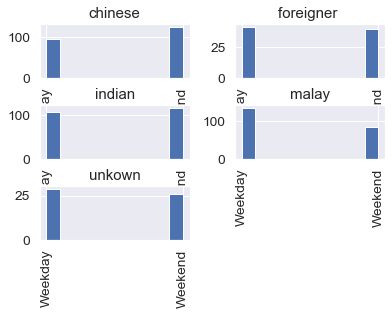

In [244]:
data[['Race','Weekday_or_Weekend']].Weekday_or_Weekend.hist(by=data.Race)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218DC305080>,
      dtype=object)

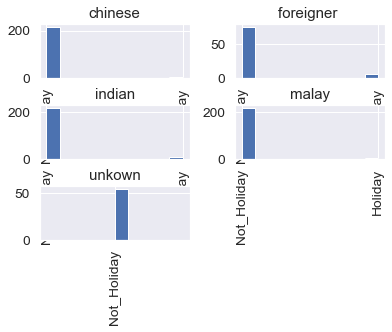

In [245]:
data[['Race','Holiday']].Holiday.hist(by=data.Race)

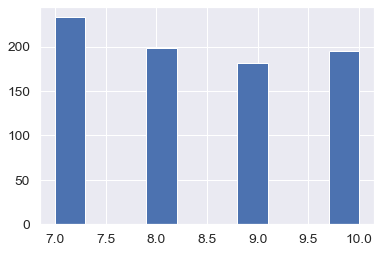

In [246]:
data['Dryer_No'].hist()

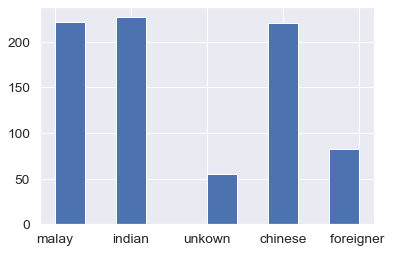

In [247]:
data['Race'].hist()

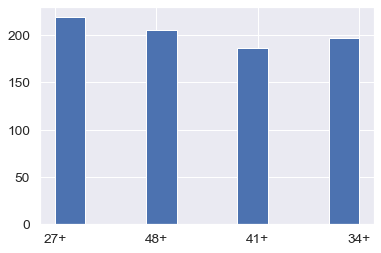

In [248]:
data['Age_Range'].hist()

In [249]:
# encoded_data['Washer_No']=data['Washer_No']
# encoded_data['Dryer_No']=data['Dryer_No']

# Modeling 

In [ ]:
# from apyori import apriori
# association_rules = apriori(data, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=4)
# association_results = list(association_rules)

In [ ]:
# print(len(association_rules))

In [ ]:
# print(association_rules[0])

In [ ]:
# for item in association_rules:

#     # first index of the inner list
#     # Contains base item and add item
#     pair = item[0] 
#     items = [x for x in pair]
#     print("Rule: " + items[0] + " -> " + items[1])

#     #second index of the inner list
#     print("Support: " + str(item[1]))

#     #third index of the list located at 0th
#     #of the third index of the inner list

#     print("Confidence: " + str(item[2][0][2]))
#     print("Lift: " + str(item[2][0][3]))
#     print("=====================================")

# Classification

In [128]:
# washer_y=encoded_data['Washer_No'].values
# dryer_y=encoded_data['Dryer_No'].values
# encoded_data.drop(['Washer_No','Dryer_No'],axis=1,inplace=True)
# X=encoded_data.values

# Washer Number Prediction 

In [251]:
import numpy as np
from sklearn.model_selection import train_test_split

XW_train, XW_test, yw_train, yw_test = train_test_split( washer_feat,washer_Y, test_size=0.45, random_state=42)

In [252]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

random_Forest = tree.DecisionTreeClassifier()

# random_Forest = RandomForestClassifier(max_depth=2, random_state=0)
random_Forest.fit(XW_train, yw_train.reshape(-1, 1))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [253]:
from sklearn.metrics import classification_report
target_names = ['Washer 3', 'Washer 4', 'Washer 5','Washer 6']
y_pred=random_Forest.predict(XW_test)
print(classification_report(yw_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Washer 3       0.46      0.41      0.43       106
    Washer 4       0.33      0.31      0.32       105
    Washer 5       0.44      0.49      0.46       100
    Washer 6       0.39      0.42      0.41       100

    accuracy                           0.41       411
   macro avg       0.41      0.41      0.41       411
weighted avg       0.41      0.41      0.41       411



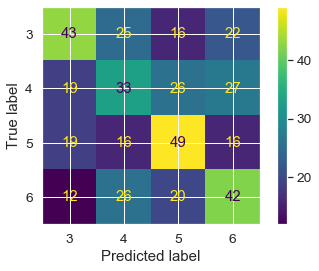

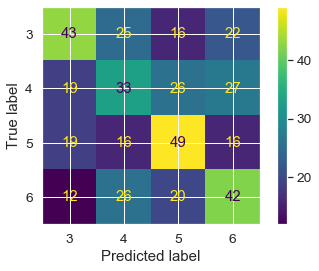

In [254]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_Forest, XW_test, yw_test).plot() 

In [255]:
# from sklearn.datasets import load_iris

# X, y = load_iris(return_X_y=True)
# clf = LogisticRegression(random_state=0).fit(X, y)

In [256]:


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(XW_train, yw_train)

 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [257]:
from sklearn.metrics import classification_report
target_names = ['Washer 3', 'Washer 4', 'Washer 5','Washer 6']
y_pred=lr.predict(XW_test)
print(classification_report(yw_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Washer 3       0.31      0.26      0.29       106
    Washer 4       0.37      0.30      0.34       105
    Washer 5       0.32      0.31      0.31       100
    Washer 6       0.28      0.38      0.32       100

    accuracy                           0.31       411
   macro avg       0.32      0.31      0.31       411
weighted avg       0.32      0.31      0.31       411



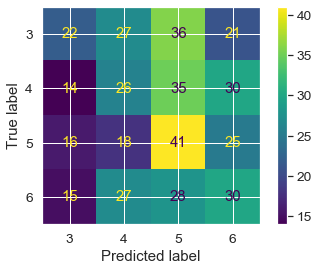

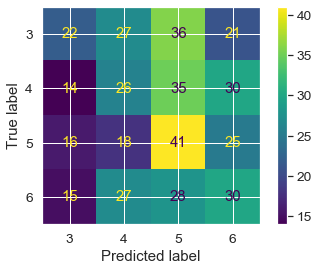

In [258]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, XW_test, yw_test).plot() 

# Dryer Number Prediction 

In [259]:
XD_train, XD_test, yd_train, yd_test = train_test_split( dryer_feat,dryer_Y, test_size=0.45, random_state=42)


In [260]:
import numpy as np
from sklearn.model_selection import train_test_split



from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix

In [261]:
random_Forest = tree.DecisionTreeClassifier()

# random_Forest = RandomForestClassifier(max_depth=2, random_state=0)
random_Forest.fit(XD_train, yd_train.reshape(-1, 1))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [262]:

# from sklearn.metrics import classification_report
target_names = ['Dryer 7', 'Dryer 8','Dryer 9','Dryer 10']
y_pred=random_Forest.predict(XD_test)
print(classification_report(yd_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Dryer 7       0.24      0.24      0.24       105
     Dryer 8       0.36      0.37      0.36       104
     Dryer 9       0.32      0.28      0.30       108
    Dryer 10       0.29      0.33      0.31       103

    accuracy                           0.30       420
   macro avg       0.30      0.30      0.30       420
weighted avg       0.30      0.30      0.30       420



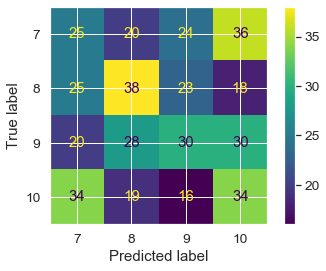

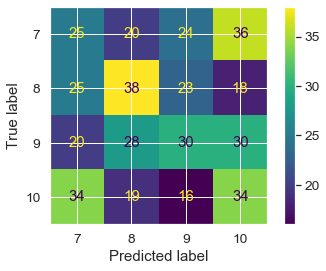

In [263]:
plot_confusion_matrix(random_Forest, XD_test, yd_test).plot() 

In [264]:
lr = LogisticRegression(random_state=0)
lr.fit(XD_train, yd_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [265]:
np.unique(dryer_Y)

array([ 7,  8,  9, 10], dtype=int64)

In [266]:
target_names = ['Dryer 7', 'Dryer 8','Dryer 9','Dryer 10']
y_pred=lr.predict(XD_test)
print(classification_report(yd_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Dryer 7       0.24      0.20      0.22       105
     Dryer 8       0.31      0.42      0.36       104
     Dryer 9       0.28      0.19      0.23       108
    Dryer 10       0.29      0.32      0.30       103

    accuracy                           0.28       420
   macro avg       0.28      0.28      0.28       420
weighted avg       0.28      0.28      0.28       420



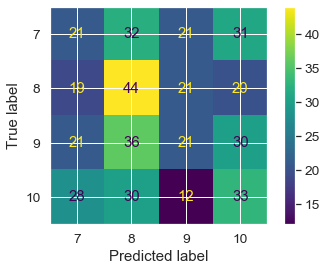

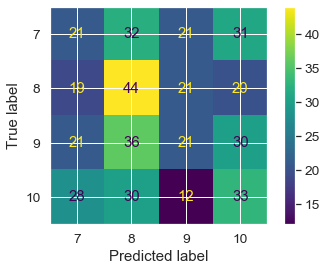

In [267]:
plot_confusion_matrix(lr, XD_test, yd_test).plot() 

# Clustering Technique

In [268]:
# !pip install kmodes

In [269]:
from kmodes.kmodes import KModes

In [270]:
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(encoded_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 240, cost: 5800.0
Run 1, iteration: 2/100, moves: 105, cost: 5679.0
Run 1, iteration: 3/100, moves: 101, cost: 5651.0
Run 1, iteration: 4/100, moves: 4, cost: 5651.0


In [271]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = encoded_data.columns

In [272]:
clusterCentroidsDf

,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Spectacles,Day_part,Month_name,Holiday,Weekday_or_Weekend
0,0,1,1,3,0,1,0,10,0,11,1,0,0,1,0,4,5,1,0
1,2,0,0,1,0,1,0,10,0,0,1,0,1,1,0,2,5,1,1
2,3,0,2,0,2,2,0,1,0,9,1,0,0,1,0,2,5,1,1
3,3,0,0,0,0,1,0,1,0,10,0,0,0,1,0,1,6,1,0


In [273]:
km_huang = KModes(n_clusters=4, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(encoded_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 337, cost: 5620.0
Run 1, iteration: 2/100, moves: 126, cost: 5528.0
Run 1, iteration: 3/100, moves: 48, cost: 5528.0


In [274]:
cost = []
for num_clusters in list(range(1,15)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(encoded_data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6849.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 194, cost: 6254.0
Run 1, iteration: 2/100, moves: 48, cost: 6254.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 208, cost: 5997.0
Run 1, iteration: 2/100, moves: 77, cost: 5997.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 240, cost: 5800.0
Run 1, iteration: 2/100, moves: 105, cost: 5679.0
Run 1, iteration: 3/100, moves: 101, cost: 5651.0
Run 1, iteration: 4/100, moves: 4, cost: 5651.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 273, cost: 5631.0
Run 1, iteration: 2/100, moves: 129, cost: 5558.0
Run 1, iteration: 3/100, moves: 72, cost: 5530.0
Run 1, 

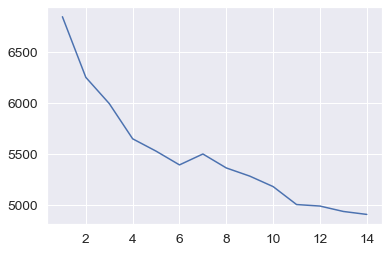

In [275]:
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,15,1)])
plt.plot(y,cost)

In [276]:
km_cao = KModes(n_clusters=6, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(encoded_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 303, cost: 5509.0
Run 1, iteration: 2/100, moves: 135, cost: 5406.0
Run 1, iteration: 3/100, moves: 92, cost: 5395.0
Run 1, iteration: 4/100, moves: 3, cost: 5395.0


In [277]:
data_cust = encoded_data.reset_index()

In [278]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [279]:
combinedDf.head()

,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Spectacles,Day_part,Month_name,Holiday,Weekday_or_Weekend,cluster_predicted
0,3,2,1,0,2,5,0,8,0,2,1,0,1,1,0,1,6,1,0,2
1,2,1,2,0,0,1,0,3,0,10,1,5,0,2,0,1,6,1,0,4
2,3,0,3,0,0,1,0,1,0,9,1,0,0,2,0,1,6,1,0,3
3,2,1,2,3,0,1,2,0,0,10,1,15,1,1,0,4,6,1,0,0
4,2,1,1,0,0,1,0,1,0,2,1,14,0,1,0,4,6,1,0,0


In [280]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [281]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 3 to 806
Data columns (total 20 columns):
Race                  261 non-null int32
Gender                261 non-null int32
Body_Size             261 non-null int32
Age_Range             261 non-null int32
With_Kids             261 non-null int32
Kids_Category         261 non-null int32
Basket_Size           261 non-null int32
Basket_colour         261 non-null int32
Attire                261 non-null int32
Shirt_Colour          261 non-null int32
shirt_type            261 non-null int32
Pants_Colour          261 non-null int32
pants_type            261 non-null int32
Wash_Item             261 non-null int32
Spectacles            261 non-null int32
Day_part              261 non-null int32
Month_name            261 non-null int32
Holiday               261 non-null int32
Weekday_or_Weekend    261 non-null int32
cluster_predicted     261 non-null uint16
dtypes: int32(19), uint16(1)
memory usage: 21.9 KB


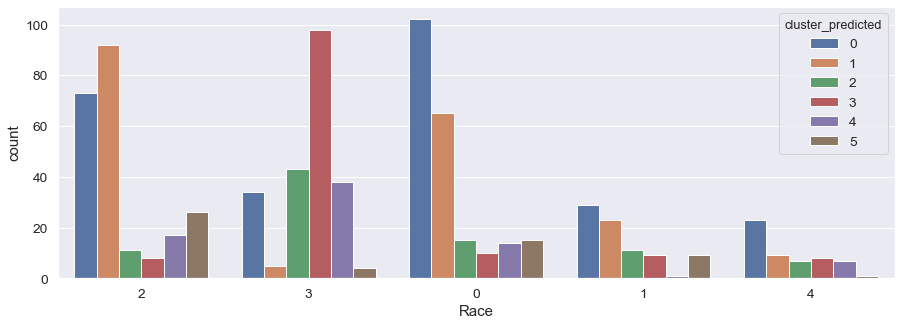

In [282]:

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Race'],order=combinedDf['Race'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [ ]:
# f, axs = plt.subplots(1,3,figsize = (15,5))
# sns.countplot(x=combinedDf['default'],order=combinedDf['default'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
# sns.countplot(x=combinedDf['housing'],order=combinedDf['housing'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
# sns.countplot(x=combinedDf['loan'],order=combinedDf['loan'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

# plt.tight_layout()
# plt.show()